In [2]:
# JUPYTER CELL 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# agar plot muncul di notebook
%matplotlib inline


In [3]:
# JUPYTER CELL 2

np.random.seed(42)

# 3 cluster "rapi"
cluster1 = 0.3 * np.random.randn(200, 2) + np.array([0, 0])
cluster2 = 0.25 * np.random.randn(150, 2) + np.array([3, 4])
cluster3 = 0.35 * np.random.randn(150, 2) + np.array([-4, 3])

# noise acak tersebar di area luas
noise = np.random.uniform(low=-7, high=7, size=(200, 2))

# gabungkan semuanya jadi satu dataset "chaos"
X = np.vstack([cluster1, cluster2, cluster3, noise])

print("Shape data:", X.shape)


Shape data: (700, 2)


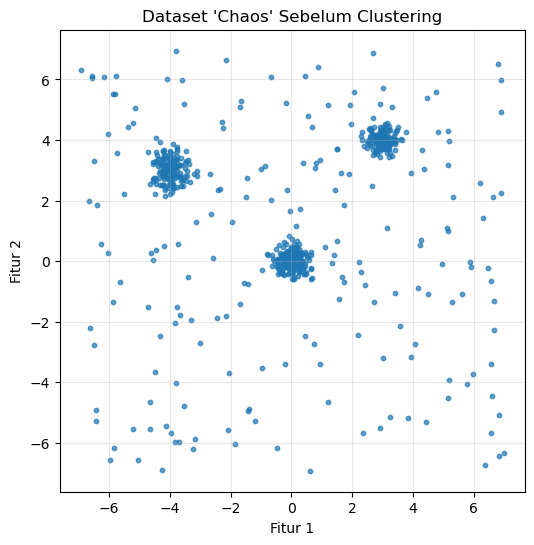

In [4]:
# JUPYTER CELL 3

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.title("Dataset 'Chaos' Sebelum Clustering")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.grid(True, alpha=0.3)
plt.show()


In [6]:
# JUPYTER CELL 4

# parameter bisa di-tuning
eps = 0.5        # radius tetangga
min_samples = 8  # minimal tetangga untuk jadi core point

db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(X)

# info dasar
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Jumlah cluster yang ditemukan:", n_clusters)
print("Jumlah titik yang dianggap noise:", n_noise)


Jumlah cluster yang ditemukan: 3
Jumlah titik yang dianggap noise: 185


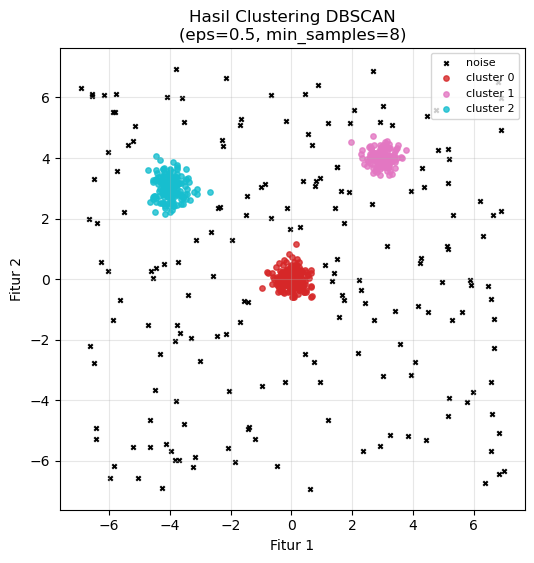

In [7]:
# JUPYTER CELL 5

plt.figure(figsize=(6, 6))

unique_labels = sorted(set(labels))
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for lab, col in zip(unique_labels, colors):
    mask = labels == lab
    if lab == -1:
        # noise
        plt.scatter(X[mask, 0], X[mask, 1],
                    c="k", s=10, marker="x", label="noise")
    else:
        plt.scatter(X[mask, 0], X[mask, 1],
                    c=col.reshape(1, -1), s=15, alpha=0.8,
                    label=f"cluster {lab}")

plt.title(f"Hasil Clustering DBSCAN\n(eps={eps}, min_samples={min_samples})")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.legend(loc="best", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()
